# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 4</span>

## 04.1

Mi è stato fornito un codice che performa una simulazione di dinamica molecolare con potenziale di Lennard-Jones. Il codice si serve della configurazione iniziale (contenuta nel file *config.0*) di $N = 108$ particelle e una volta che la simulazione è terminata salva la configurazione finale in un file *config.final*. Le velocità iniziali sono generate in modo casuale da una distribuzione uniforme con centro di massa pari a zero e alla temperatura desiderata.
Per prima cosa ho migliorato il codice per permettere la possibilità di far ripartire la simulazione dagli step finali di quella precedente. Ho fatto memorizzare non solo la configurazione finale, ma anche quella al tempo precedente salvandola in un file *old.final*. Ho anche creato un file *old.0*, che viene letto quando si vuole far ripartire la simulazione e quindi sarà necessario copiare in esso i valori di *old.final*.

Quando è permessa la ripartenza il codice legge quindi per ogni particella del sistema la posizione finale $r(t)$ e quella precedente $r_{old} = r(t-dt)$. In seguito procede al calcolo delle velocità iniziali nel seguente modo:
- è eseguito per tutte le particelle un passo con l'algoritmo di Verlet per ottenere $r(t+dt)$;
- le velocità iniziali sono calcolate tramite $v(t) = \frac{r(t+dt) - r_{old}}{2dt}$;
- viene poi calcolato il fattore di riscalalmento di tali velocità al fine di far simulare il sistema alla temperatura desiderata. Esso è $f_s = \sqrt{\frac{temp}{T}}$, in cui $temp$ è la temperatura letta in input a cui si vuole simulare il sistema e $T$ è la temperatura della configurazione attuale e viene calcolata come $T = \frac{\sum_{i=1}^{N} v^2_i(t)}{3 N}$;
- le velocità sono riscalate moltiplicandole per il fattore $f_s$;
- sono calcolate le nuove posizioni iniziali come $r_{old} = r(t) - v(t)dt$.

Per decidere da quale configurazione partire ho aggiunto un'ulteriore variabile al file di input che ho chiamato *irestart*. Se viene settata a $0$ allora il codice legge in input *config.0* in cui ho copiato la configurazione di un reticolo FCC e genera velocità casuali con centro di massa nullo; se invece viene settata a $1$ legge in input la configurazione finale e quella precedente e si calcola le posizioni iniziali nel modo appena descritto.

## 04.2

La simulazione così come mi è stata fornita provvedeva a stampare i valori istantanei delle grandezze calcolate. Ho quindi aggiunto la capacità di effettuare una media statistica a blocchi e una stima dell'incertezza delle grandezze calcolate durante gli step della simulazione. Per farlo ho implementato delle funzioni che ho aggiunto al codice: *Reset* che è una funzione che azzera all'inizio di ogni blocco i vettori su cui sommare le grandezze che vengono misurate; *Accumulate* che accumula sui rispettivi vettori i valori calcolati nella funzione *Measure* durante gli step della simulazione; *Averages* che fa una media fra i valori accumulati all'interno di un blocco e dipende dal numero di blocco in cui ci si trova. Ho diviso la simulazione in $50$ blocchi e ho effettuato $500$ step per blocco. La funzione *Measure* che misura i valori istantanei viene chiamata ogni $10$ step di simulazione per poter evitare di avere valori successivi molto correlati.

## 04.3

Ho calcolato i valori di energia totale, potenziale e cinetica per particella e di temperatura per l'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti fasi:

1. solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Il codice calcola le grandezze in unità di Lennard-Jones e quindi per poter ottenere i valori in unità del sistema internazionale ho moltiplicato i risultati per gli opportuni fattori correttivi.

Per prima cosa ho eseguito il programma con l'indice *irestart* nullo e partendo da una configurazione iniziale di reticolo FCC. Ho posto poi *irestart* pari a $1$ e ho eseguito il programma salvando, alla fine di ciascuna simulazione, le configurazioni finali della simulazione precendente in *config.0* e *old.0*. Ho fatto questa operazione tante volte quante fossero necessarie affinchè il sistema si trovasse alla temperatura desiderata. Una volta raggiunta questa temperatura ho iniziato a prendere le misure medie delle grandezze. Questa fase si chiama equilibrazione ed è stata necessaria all'inzio della simulazione per ogni fase. Partendo da una configurazione iniziale di reticolo FCC, che costituisce una struttura cristallina perfetta e quindi a bassissima energia potenziale, si osserva un crollo della temperatura rispetto al valore dato in input. Questo è dovuto a una diminuzione di energia cinetica (sono infatti proporzionali) data dall'aumento di quella potenziale, poichè il sistema tende a disordinare la configurazione perfetta del cristallo. Le due energie sono legate poichè l'energia totale si conserva, essendo che ci troviamo nell'insieme microcanonico.
Facendo ripartire la simulazione, le velocità vengono riscalate per fattori che conferiscono al sistema una energia sempre più alta rispetto alle precedenti e quindi la temperatura sale fino al valore desiderato.

Ho mostrato l'equilibrazione della temperatura per le tre fasi dell'Argon. Ho creato tre file di *input* a seconda della fase da simulare e prima di passare alla fase successiva è necessario nel *main* cambiare il file di *input* da leggere commentando quello precedente.

### Fase solida
#### Equilibrazione

Dapprima mostro la fase di equilibrazione. Nel caso di Argon solido sono state necessarie $5$ simulazioni per portare il sistema alla temperatura desiderata. Le misure istantanee delle grandezze sono le stime calcolate ogni $10$ step di quelli contenuti in ogni blocco.

- Nel primo grafico mostro la temperatura in funzione degli step della simulazione e ogni volta che si osserva  un innalzamento della temperatura è per il fatto che è stata fatta ripartire con velocità riscalate.

- Nel secondo e terzo grafico mostro l'andamento delle grandezze istantanee durante la quinta simulazione. Ho deciso di mostrarlo perchè queste fluttuano attorno a un valore medio. La temperatura oscilla attorno al valore di target dato in input. Anche l'energia totale ha quindi delle fluttuazioni, che però sono molto più piccole rispetto a quelle delle altre quantità (l'algoritmo di Verlet conserva bene l'energia).

#### Misure delle grandezze medie con le incertezze statistiche

Mostro poi le quantità medie con le rispettive incertezze statistiche calcolate per ogni blocco.


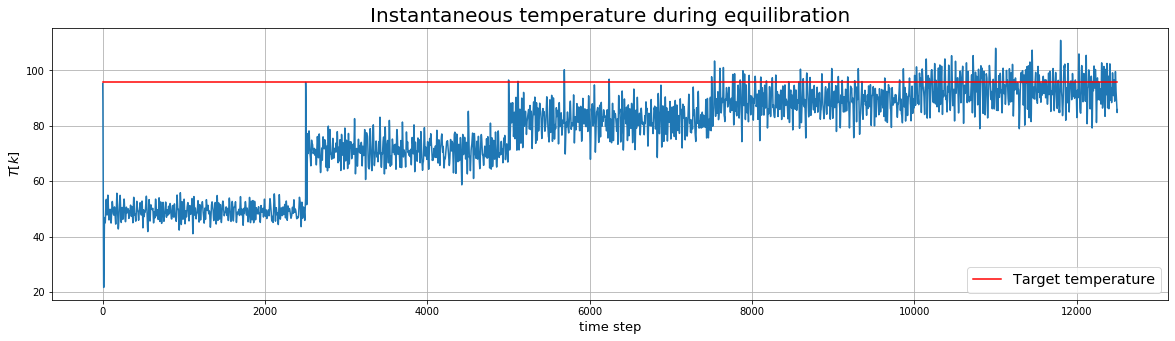

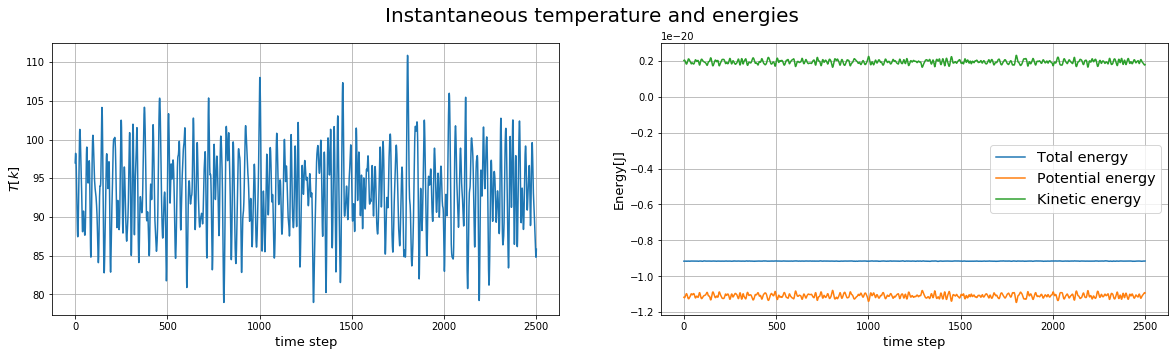

In [22]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import math
from scipy import stats

epsilon_kB = 120. #kelvin
kb = 1.380649*(10.**(-23))
epsilon = epsilon_kB*kb

T = np.loadtxt('MolecularDynamics_NVE/equilibration_solid_temp.dat', unpack=True, usecols=(0))
T = T*epsilon_kB #converto in SI units
l = len(T)
x = np.linspace(0, l, l)

plt.figure(figsize=(20,5))
plt.plot(x, T)
plt.title('Instantaneous temperature during equilibration', fontsize=20)
plt.plot([0, l], [0.8*epsilon_kB, 0.8*epsilon_kB], color='r', label='Target temperature')
plt.xlabel('time step', fontsize=13)
plt.ylabel('$T[k]$', fontsize=13)
plt.legend(loc=4, fontsize='x-large')
plt.grid()

(T_eq) = np.loadtxt('MolecularDynamics_NVE/solid/output_temp.dat', unpack=True, usecols=(0))
(Etot_eq) = np.loadtxt('MolecularDynamics_NVE/solid/output_etot.dat', unpack=True, usecols=(0))
(Epot_eq) = np.loadtxt('MolecularDynamics_NVE/solid/output_epot.dat', unpack=True, usecols=(0))
(Ekin_eq) = np.loadtxt('MolecularDynamics_NVE/solid/output_ekin.dat', unpack=True, usecols=(0))

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.suptitle('Instantaneous temperature and energies', fontsize=20)

T_eq = T_eq*epsilon_kB #converto in SI units
l_eq = len(T_eq)
x_eq = np.linspace(0, l_eq, l_eq)
axs[0].plot(x_eq, T_eq)
axs[0].set_ylabel('$T[k]$', fontsize=13)

axs[1].plot(x_eq, Etot_eq*epsilon, label='Total energy')
axs[1].plot(x_eq, Epot_eq*epsilon, label='Potential energy')
axs[1].plot(x_eq, Ekin_eq*epsilon, label='Kinetic energy')
axs[1].set_ylabel('Energy[J]', fontsize=13)
axs[1].legend(fontsize='x-large')

for ax in axs.flat:
    ax.set_xlabel('time step', fontsize=13)
    ax.grid()

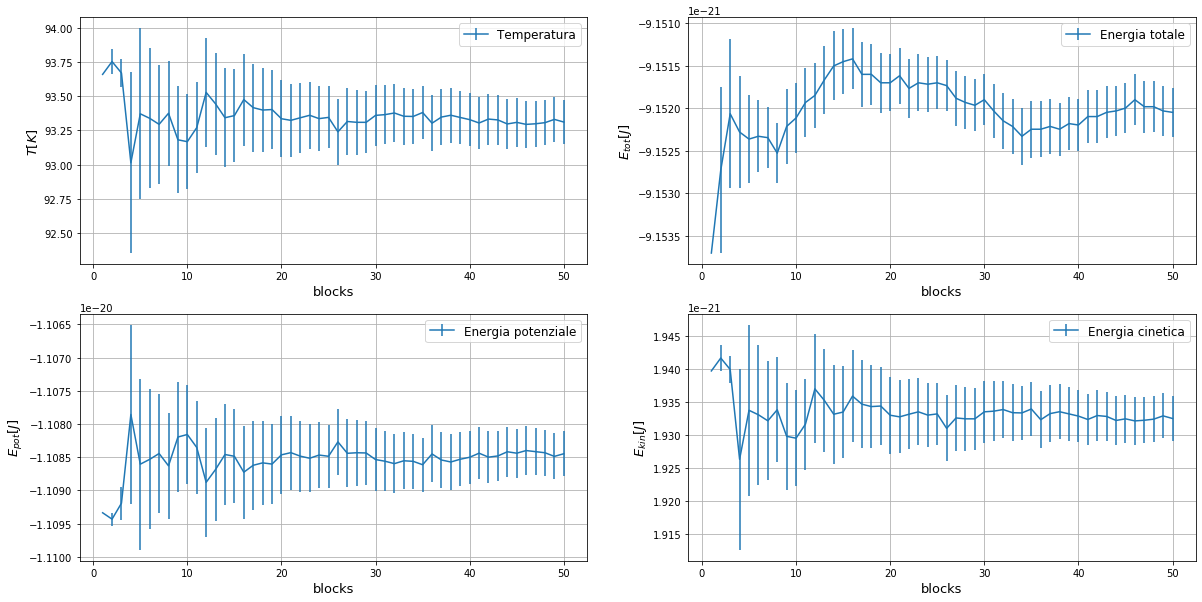

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

(blk, Ekin, errEkin) = np.loadtxt('MolecularDynamics_NVE/solid/ave_ekin.dat', unpack=True, usecols=(0,2,3))
Ekin = Ekin*epsilon
errEkin = errEkin*epsilon

(blk, Epot, errEpot) = np.loadtxt('MolecularDynamics_NVE/solid/ave_epot.dat', unpack=True, usecols=(0,2,3))
Epot = Epot*epsilon
errEpot = errEpot*epsilon

(blk, Etot, errEtot) = np.loadtxt('MolecularDynamics_NVE/solid/ave_etot.dat', unpack=True, usecols=(0,2,3))
Etot = Etot*epsilon
errEtot = errEtot*epsilon

(blk, T, errT) = np.loadtxt('MolecularDynamics_NVE/solid/ave_temp.dat', unpack=True, usecols=(0,2,3))
T = T*epsilon_kB #converto in SI units
errT = errT*epsilon_kB

# Temperatura
axs[0,0].errorbar(blk, T, yerr=errT, label='Temperatura')
axs[0,0].set_ylabel('$T[K]$', fontsize=13)
axs[0,0].legend(loc=1, fontsize='large')

# Energia Totale
axs[0,1].errorbar(blk, Etot, yerr=errEtot, label='Energia totale')
axs[0,1].set_ylabel('$E_{tot}[J]$', fontsize=13)
axs[0,1].legend(loc=1, fontsize='large')

# Energia potenziale
axs[1,0].errorbar(blk, Epot, yerr=errEpot, label='Energia potenziale')
axs[1,0].set_ylabel('$E_{pot}[J]$', fontsize=13)
axs[1,0].legend(loc=1, fontsize='large')

# Energia cinetica
axs[1,1].errorbar(blk, Ekin, yerr=errEkin, label='Energia cinetica')
axs[1,1].set_ylabel('$E_{kin}[J]$', fontsize=13)
axs[1,1].legend(loc=1, fontsize='large')

for ax in axs.flat:
    ax.set_xlabel('blocks', fontsize=13)
    ax.grid()

### Fase liquida
#### Equilibrazione

Nel caso di Argon liquido sono state necessarie $4$ simulazioni per portare il sistema alla temperatura desiderata. I grafici che mostro sono analoghi a quelli della fase solida.
Sia nella fase liquida che solida la temperatura si abbassa nei primi passi per poi tornare a salire e fluttuare attorno a un valore medio. In entrambi i casi le simulazioni partono da configurazioni che sono vicine al minimo potenziale.

#### Misure delle grandezze medie con le incertezze statistiche

Mostro poi le quantità medie con le rispettive incertezze statistiche calcolate per ogni blocco.

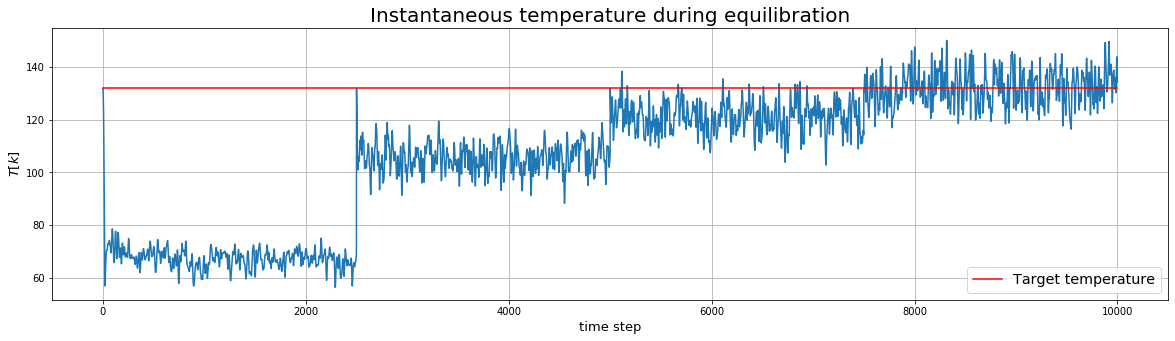

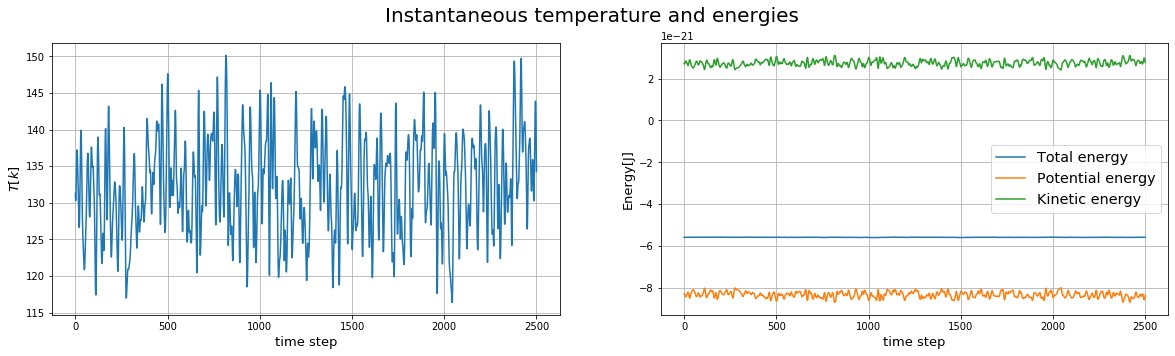

In [24]:
T = np.loadtxt('MolecularDynamics_NVE/equilibration_liquid_temp.dat', unpack=True, usecols=(0))
T = T*epsilon_kB #converto in SI units
l = len(T)
x = np.linspace(0, l, l)

plt.figure(figsize=(20,5))
plt.plot(x, T)
plt.title('Instantaneous temperature during equilibration', fontsize=20)
plt.plot([0, l], [1.1*epsilon_kB, 1.1*epsilon_kB], color='r', label='Target temperature')
plt.xlabel('time step', fontsize=13)
plt.ylabel('$T[k]$', fontsize=13)
plt.legend(loc=4, fontsize='x-large')
plt.grid()

(T_eq) = np.loadtxt('MolecularDynamics_NVE/liquid/output_temp.dat', unpack=True, usecols=(0))
(Etot_eq) = np.loadtxt('MolecularDynamics_NVE/liquid/output_etot.dat', unpack=True, usecols=(0))
(Epot_eq) = np.loadtxt('MolecularDynamics_NVE/liquid/output_epot.dat', unpack=True, usecols=(0))
(Ekin_eq) = np.loadtxt('MolecularDynamics_NVE/liquid/output_ekin.dat', unpack=True, usecols=(0))

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.suptitle('Instantaneous temperature and energies', fontsize=20)

T_eq = T_eq*epsilon_kB #converto in SI units
l_eq = len(T_eq)
x_eq = np.linspace(0, l_eq, l_eq)
axs[0].plot(x_eq, T_eq)
axs[0].set_ylabel('$T[k]$', fontsize=13)

axs[1].plot(x_eq, Etot_eq*epsilon, label='Total energy')
axs[1].plot(x_eq, Epot_eq*epsilon, label='Potential energy')
axs[1].plot(x_eq, Ekin_eq*epsilon, label='Kinetic energy')
axs[1].set_ylabel('Energy[J]', fontsize=13)
axs[1].legend(fontsize='x-large')

for ax in axs.flat:
    ax.set_xlabel('time step', fontsize=13)
    ax.grid()

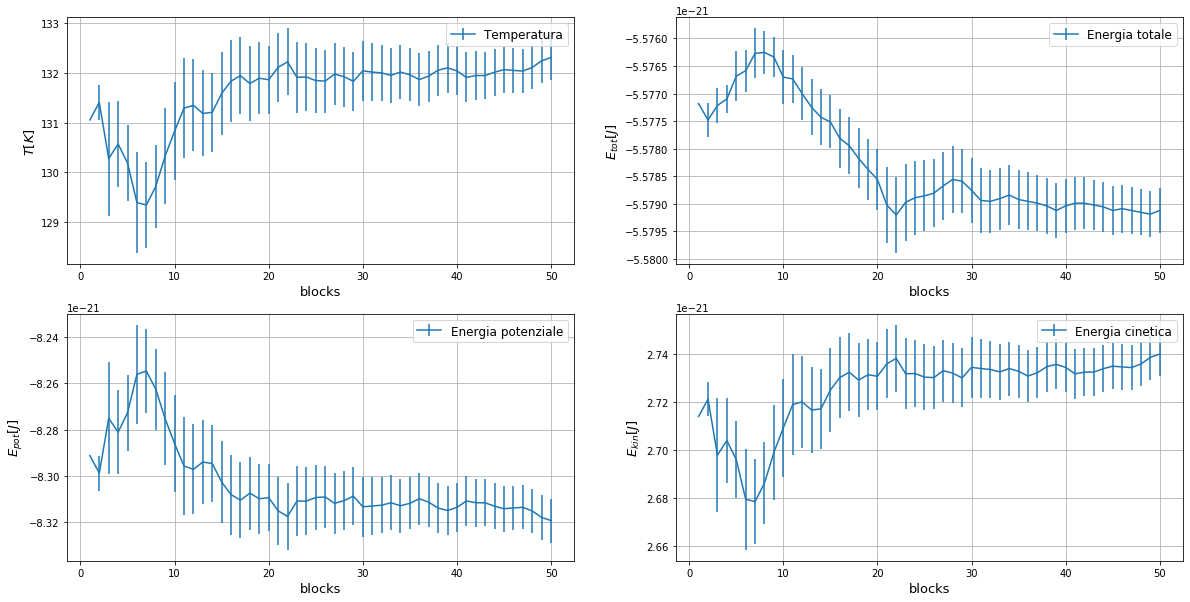

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

(blk, Ekin, errEkin) = np.loadtxt('MolecularDynamics_NVE/liquid/ave_ekin.dat', unpack=True, usecols=(0,2,3))
Ekin = Ekin*epsilon
errEkin = errEkin*epsilon

(blk, Epot, errEpot) = np.loadtxt('MolecularDynamics_NVE/liquid/ave_epot.dat', unpack=True, usecols=(0,2,3))
Epot = Epot*epsilon
errEpot = errEpot*epsilon

(blk, Etot, errEtot) = np.loadtxt('MolecularDynamics_NVE/liquid/ave_etot.dat', unpack=True, usecols=(0,2,3))
Etot = Etot*epsilon
errEtot = errEtot*epsilon

(blk, T, errT) = np.loadtxt('MolecularDynamics_NVE/liquid/ave_temp.dat', unpack=True, usecols=(0,2,3))
T = T*epsilon_kB
errT = errT*epsilon_kB

# Temperatura
axs[0,0].errorbar(blk, T, yerr=errT, label='Temperatura')
axs[0,0].set_ylabel('$T[K]$', fontsize=13)

# Energia Totale
axs[0,1].errorbar(blk, Etot, yerr=errEtot, label='Energia totale')
axs[0,1].set_ylabel('$E_{tot}[J]$', fontsize=13)

# Energia potenziale
axs[1,0].errorbar(blk, Epot, yerr=errEpot, label='Energia potenziale')
axs[1,0].set_ylabel('$E_{pot}[J]$', fontsize=13)

# Energia cinetica
axs[1,1].errorbar(blk, Ekin, yerr=errEkin, label='Energia cinetica')
axs[1,1].set_ylabel('$E_{kin}[J]$', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('blocks', fontsize=13)
    ax.legend(fontsize='large')
    ax.grid()

### Fase gassosa
#### Equilibrazione

Nel caso di Argon gassoso ho continuato a far ripartire le simulazioni per poter equilibrare il sistema. Le oscillazioni mi sono sembrate grandi rispetto a quelle delle fasi precedenti e quindi ho eseguito $12$ simulazioni per osservare se il sistema si stabilizzasse al temperatura desiderata. Ho notato che il sistema continua a oscillare e non riesce a porsi attorno alla temperatura target. Ho deciso comunque di prendere le misure alla dodicesima simulazione. La temperatura che tende ad avere un sistema come quello gassoso è più alta di quella data in input, quindi nella prima simulazione al posto che osservare un abbassamento di questa, ho osservato che si pone ad un valore più alto.

#### Misure delle grandezze medie con le incertezze statistiche

Mostro le quantità medie con le rispettive incertezze statistiche calcolate per ogni blocco. In particolare si osserva che l'energia totale dell'Argon nella fase gassosa è positiva, per il fatto che l'energia cinetica dà un contributo maggiore rispetto a quella potenziale e il sistema in queste condizioni non è legato.

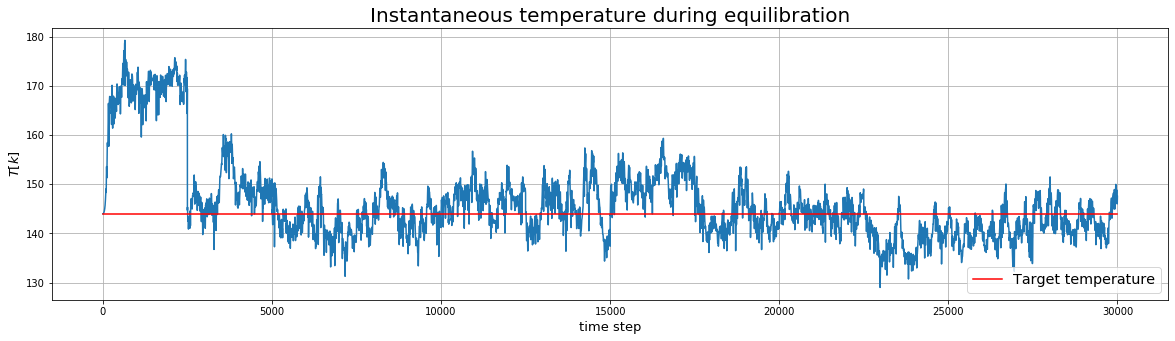

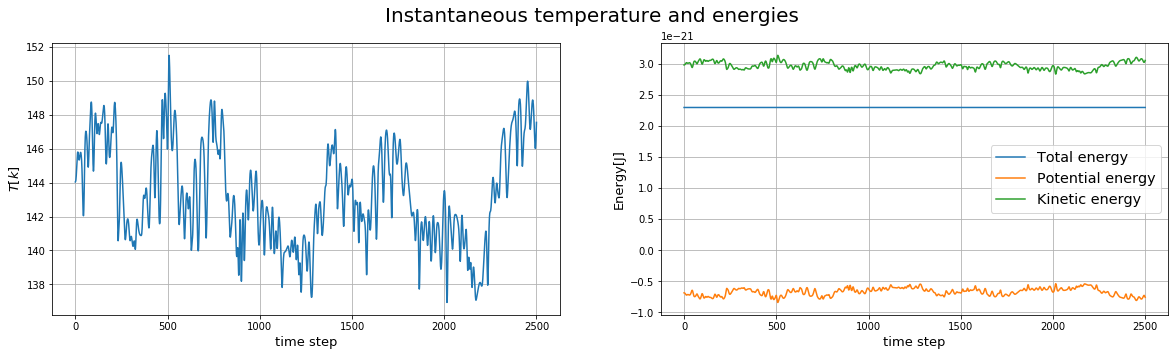

In [26]:
T = np.loadtxt('MolecularDynamics_NVE/equilibration_gas_temp.dat', unpack=True, usecols=(0))
T = T*epsilon_kB #converto in SI units
l = len(T)
x = np.linspace(0, l, l)

plt.figure(figsize=(20,5))
plt.plot(x, T)
plt.title('Instantaneous temperature during equilibration', fontsize=20)
plt.plot([0, l], [1.2*epsilon_kB, 1.2*epsilon_kB], color='r', label='Target temperature')
plt.xlabel('time step', fontsize=13)
plt.ylabel('$T[k]$', fontsize=13)
plt.legend(loc=4, fontsize='x-large')
plt.grid()

(T_eq) = np.loadtxt('MolecularDynamics_NVE/gas/output_temp.dat', unpack=True, usecols=(0))
(Etot_eq) = np.loadtxt('MolecularDynamics_NVE/gas/output_etot.dat', unpack=True, usecols=(0))
(Epot_eq) = np.loadtxt('MolecularDynamics_NVE/gas/output_epot.dat', unpack=True, usecols=(0))
(Ekin_eq) = np.loadtxt('MolecularDynamics_NVE/gas/output_ekin.dat', unpack=True, usecols=(0))

fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.suptitle('Instantaneous temperature and energies', fontsize=20)

T_eq = T_eq*epsilon_kB #converto in SI units
l_eq = len(T_eq)
x_eq = np.linspace(0, l_eq, l_eq)
axs[0].plot(x_eq, T_eq)
axs[0].set_ylabel('$T[k]$', fontsize=13)

axs[1].plot(x_eq, Etot_eq*epsilon, label='Total energy')
axs[1].plot(x_eq, Epot_eq*epsilon, label='Potential energy')
axs[1].plot(x_eq, Ekin_eq*epsilon, label='Kinetic energy')
axs[1].set_ylabel('Energy[J]', fontsize=13)
axs[1].legend(fontsize='x-large')

for ax in axs.flat:
    ax.set_xlabel('time step', fontsize=13)
    ax.grid()

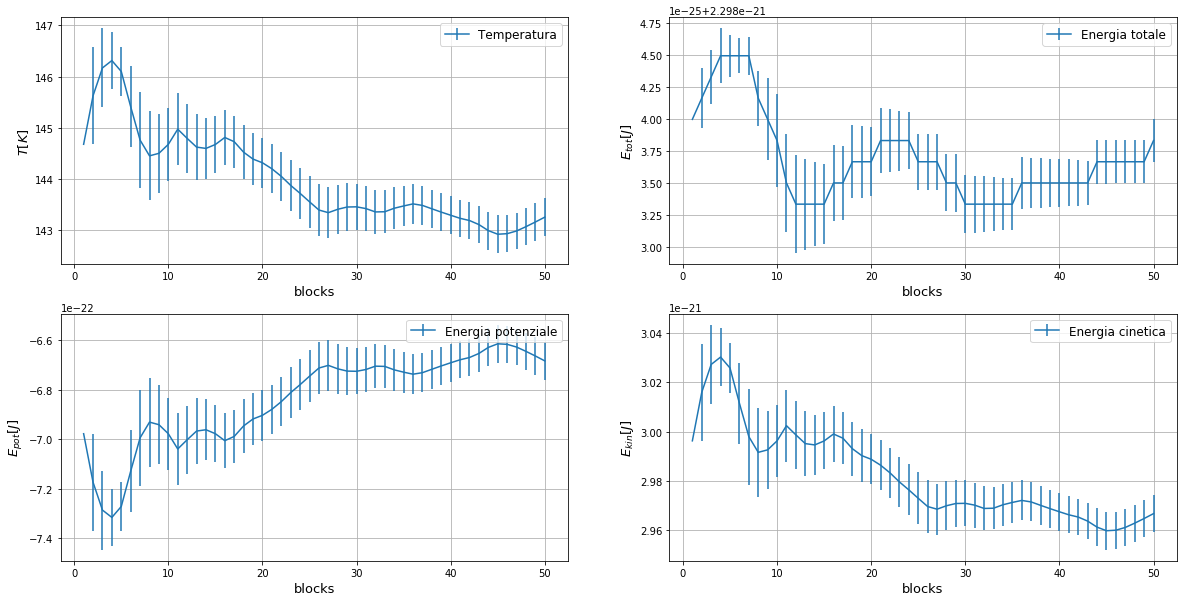

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

(blk, Ekin, errEkin) = np.loadtxt('MolecularDynamics_NVE/gas/ave_ekin.dat', unpack=True, usecols=(0,2,3))
Ekin = Ekin*epsilon
errEkin = errEkin*epsilon

(blk, Epot, errEpot) = np.loadtxt('MolecularDynamics_NVE/gas/ave_epot.dat', unpack=True, usecols=(0,2,3))
Epot = Epot*epsilon
errEpot = errEpot*epsilon

(blk, Etot, errEtot) = np.loadtxt('MolecularDynamics_NVE/gas/ave_etot.dat', unpack=True, usecols=(0,2,3))
Etot = Etot*epsilon
errEtot = errEtot*epsilon

(blk, T, errT) = np.loadtxt('MolecularDynamics_NVE/gas/ave_temp.dat', unpack=True, usecols=(0,2,3))
T = T*epsilon_kB
errT = errT*epsilon_kB

# Temperatura
axs[0,0].errorbar(blk, T, yerr=errT, label='Temperatura')
axs[0,0].set_ylabel('$T[K]$', fontsize=13)
axs[0,0].legend(loc=1, fontsize='large')

# Energia Totale
axs[0,1].errorbar(blk, Etot, yerr=errEtot, label='Energia totale')
axs[0,1].set_ylabel('$E_{tot}[J]$', fontsize=13)
axs[0,1].legend(loc=1, fontsize='large')

# Energia potenziale
axs[1,0].errorbar(blk, Epot, yerr=errEpot, label='Energia potenziale')
axs[1,0].set_ylabel('$E_{pot}[J]$', fontsize=13)
axs[1,0].legend(loc=1, fontsize='large')

# Energia cinetica
axs[1,1].errorbar(blk, Ekin, yerr=errEkin, label='Energia cinetica')
axs[1,1].set_ylabel('$E_{kin}[J]$', fontsize=13)
axs[1,1].legend(loc=1, fontsize='large')

for ax in axs.flat:
    ax.set_xlabel('blocks', fontsize=13)
    ax.grid()